# Trabajo práctico 1 



**Human activity recognition**

https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/intro_ia/tree/cohorte-6/clase_2/jupyterbooks/data

**MNIST**

    from sklearn.datasets import fetch_openml
    X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


Deben maximizarse la cantidad de operaciones vectorizadas en las implementaciones.


## Ejercicio 1 - Implementar clase PCA con numpy
**Dataset** Human activity recognition

Tomar las primeras 63 componentes principales y calcular la varianza contemplada. Realizar las operaciones internas con numpy.linalg. 

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

class PCA:
    def __init__(self,N):
        self.N = N
        self.components = None
        self.mean = None
        
    def fit(self,X):
        self.mean = np.mean(X, axis=0)
        #X = X - self.mean
        cov = np.cov(X , rowvar = False)
        autoValores , autoVectores = np.linalg.eigh(cov)
        #autoVectores = autoVectores.T
        
        idxs = np.argsort(autoValores)[::-1]
        autoVectores = autoVectores[:,idxs]
        autoValores = autoValores[idxs]
        
        
        self.components = autoVectores[:,0:self.N]
        
        return  np.cumsum( autoValores / np.sum(autoValores))
        
        
    def transf(self,X):
        #X = X - self.mean
        return np.dot(X, self.components)
    
    
    


In [2]:
PATH_DATASET = "HAPT Data Set/train"
X_train = np.loadtxt(os.path.join(PATH_DATASET, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DATASET, "y_train.txt")).astype(int)

print("Estructura features del dataset: {}".format(X_train.shape))
print("Estructura de las etiquetas: {}".format(y_train.shape))

Estructura features del dataset: (7767, 561)
Estructura de las etiquetas: (7767,)


In [3]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA(63)
acum = pca.fit(X_scaled)
X_pca = pca.transf(X_scaled)

print(X_pca)

[[ 16.37720711  -2.36209464  -3.08104197 ...   1.53513003  -1.32648262
   -0.66125962]
 [ 15.5072942   -2.01415921   0.70146543 ...  -1.34084659   0.44124329
    0.32958579]
 [ 15.35829162  -3.14150722   1.50330429 ...  -0.94921983  -0.33774227
    0.07262715]
 ...
 [-13.45392072  10.86219474   0.19102487 ...   0.21364098  -0.43633752
    0.18592099]
 [-11.99069689  12.4583534    1.84222577 ...   0.2155783   -0.30018434
    1.28271004]
 [-12.17041683  10.71377417   2.61210118 ...  -0.02951967   1.43136127
    1.13801498]]


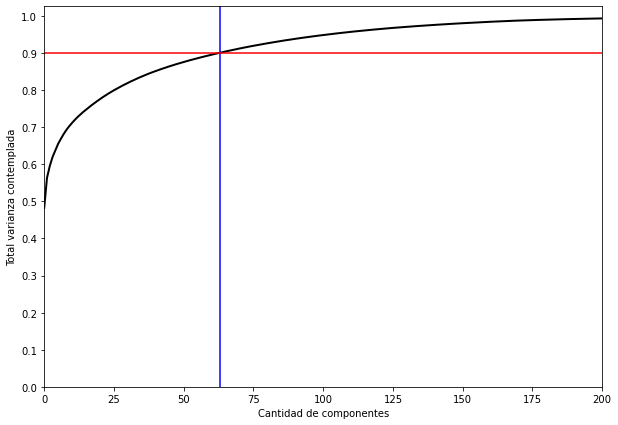

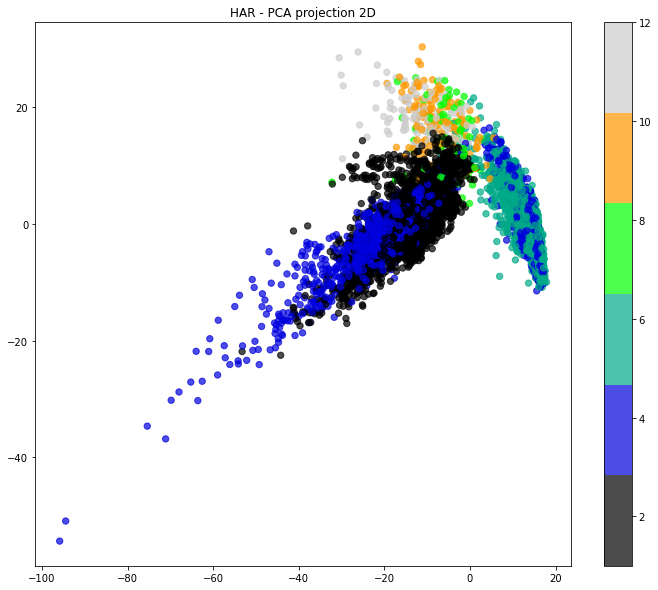

In [4]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(10,7))
plt.plot(acum, color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(63, c='b')
plt.axhline(0.9, c='r')
plt.show();

plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False #Evita un warning
plt.colorbar()
plt.title('HAR - PCA projection 2D');


## Ejercicio 2 - Implementar clase KMeans con numpy
**Dataset** Human activity recognition

Implementar kmeans con numpy. Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de k=2 y 6. Graficar los casos de k=2 y k=6 con las primeras dos componentes principales.

In [5]:
import random
class miKMeans:
    def __init__(self, data,n_cluster):
        self.X = data
        self.n_cluster = n_cluster
        self.cluster_centers_ = data[random.sample(range(data.shape[0]), n_cluster)]
        #print ("Centroides = ")
        #print ( self.cluster_centers_ )

        self.distancias()
        
    def distancias(self):
        centroides = self.cluster_centers_
        # Calcula la distancia entre x y cada uno de los centroides
        columnasX,filasX = self.X.shape
        columnasC,filasC = centroides.shape
        distancias = np.empty((columnasX,columnasC))
        for idx in np.arange(columnasX):
            fila = np.empty((columnasC))
            for f in np.arange(columnasC):
                resta = (self.X[idx,:] - centroides[f,:])
                dist =  np.sqrt((resta ** 2).sum())
                fila[f] = dist

            distancias[idx] = fila

        #print ("distancias")
        #print (distancias)
            
        clusters = np.empty((columnasX))
        for idx in np.arange(columnasX):
            clusters[idx] = np.argmin(distancias[idx])
        
        self.clusters = clusters
        return 

    def recalCentro(self, N):
        print (self.n_cluster)
        for j in range(N):
            for i in np.arange(self.n_cluster):
                filtro = self.X[np.where(self.clusters == i)]
                self.cluster_centers_[i] = filtro.sum(axis = 0) / filtro.shape[0]
                #print (i , filtro, self.cluster_centers_[i])

        
        #print ("Centroides = ")
        #print ( self.cluster_centers_ )

        self.distancias()

        
        return 

In [6]:
#kmeans = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)
#kmeans.fit(X_pca)
#cluster_labels = kmeans.labels_


6


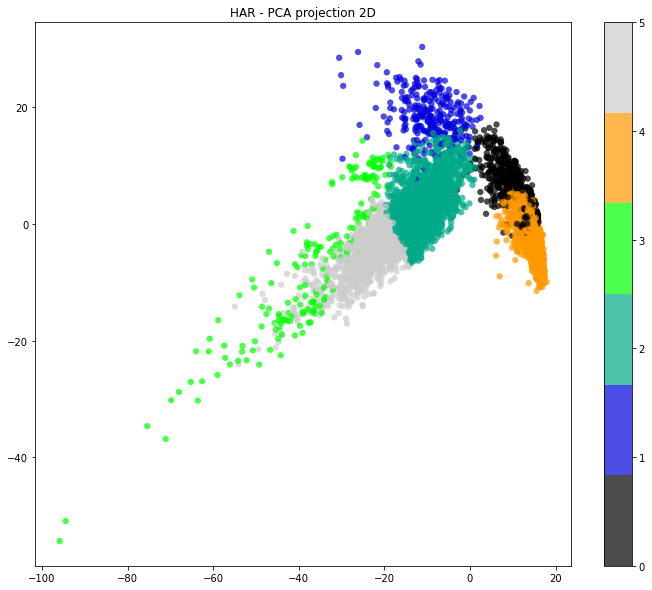

In [7]:

KM = miKMeans(X_pca,6)

KM.recalCentro(100)


# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=KM.clusters, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');


2


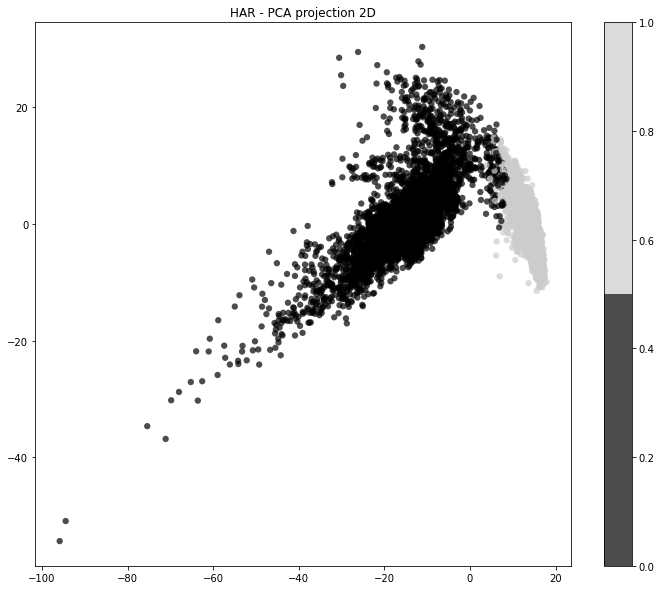

In [8]:
KM = miKMeans(X_pca,2)

KM.recalCentro(100)


# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=KM.clusters, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');

## Ejercicio 3 - Comparar los ejercicios anteriores con lo visto en las clases

In [9]:
# not implemented

## Ejercicio 4 - PCA + KMeans

**Dataset**: MNIST

Con las implementaciones de sklearn, tomar las componentes principales que capturen el 90% de la varianza y aplicar kmeans para agrupar los dígitos en 10 clusters. Analizar los resultados. 

In [10]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


x_train = x_train.reshape((60000, 28*28))

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)

pca = PCA(138)
acum = pca.fit(X_scaled)
X_pca = pca.transf(X_scaled)

print(X_pca)

[[-8.01174771e-01  2.08667487e+01 -1.29451358e+01 ... -1.29430216e-01
  -2.17327515e-01  7.78896313e-01]
 [ 1.70742060e+01 -4.96851249e+00 -2.07781957e+00 ... -1.26119907e+00
   2.68120051e-01  1.07433312e+00]
 [-9.60164085e+00 -1.22961007e+01  1.08228415e+00 ...  2.79913542e-01
  -5.05242887e-01  2.79410435e-01]
 ...
 [ 9.37766441e+00 -1.31058579e+01 -8.83829805e+00 ... -6.75643157e-01
  -3.05745626e-01  5.27005686e-01]
 [-9.64563637e+00 -7.09528763e+00  6.94533514e+00 ... -1.56456987e-01
   1.90335936e-01  6.21821742e-03]
 [-2.13170793e+01 -1.74136729e+00  5.47629241e+00 ...  5.79342597e-01
  -3.91901599e-01 -2.22774918e-01]]


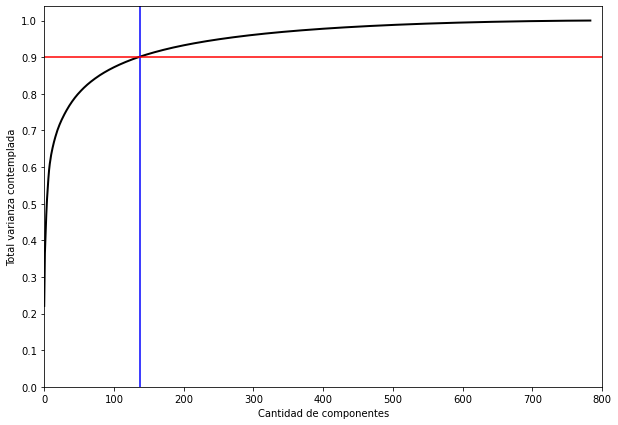

In [12]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(10,7))
plt.plot(acum, color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 800)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(138, c='b')
plt.axhline(0.9, c='r')
plt.show();



10


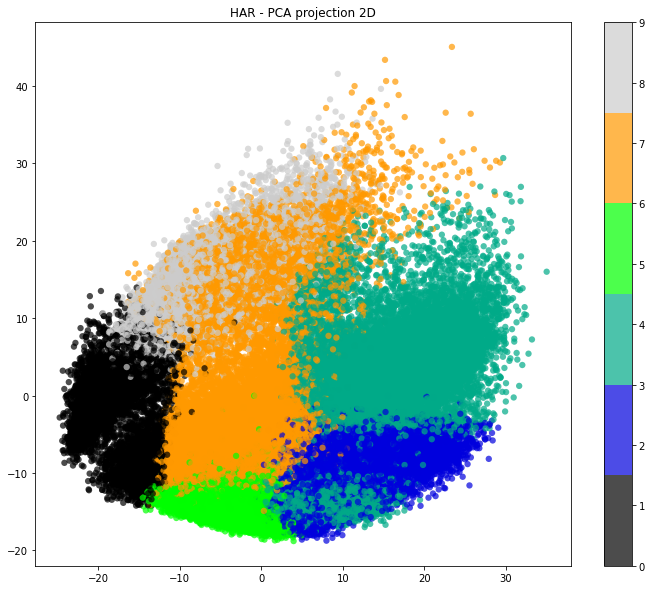

In [13]:
KM = miKMeans(X_pca,10)

KM.recalCentro(100)


# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=KM.clusters, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');
